# Normality Testing

In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
import seaborn as sns # for nice looking plots
# display plots in the notebook
%matplotlib inline

# increase default figure and font sizes for easier viewing
plt.rcParams['figure.figsize'] = (8, 6)
plt.rcParams['font.size'] = 14

In [28]:
n=50
def random_distributions(n=50):
  mu, sigma, p = 5, 2*np.sqrt(2), 0.3# mean, standard deviation, probabilty of success
  shape, scale = 2.5, 2. # mean=5, std=2*sqrt(2)
  normal_dist = np.random.normal(mu, sigma, n)
  lognormal_dist = np.random.lognormal(mu, sigma, n)
  lognormal_dist = np.random.lognormal(np.log2(mu), np.log2(sigma), n) 
  pareto_dist = np.random.pareto(mu, n)
  uniform_dist= np.random.uniform(np.amin(normal_dist),np.amax(normal_dist),n)
  binomial_dist= np.random.binomial(n, p,n)
  gamma_dist= np.random.gamma(shape, scale, n) 
  poisson_dist= np.random.poisson((n*0.05), n)  
  df = pd.DataFrame({'Normal' : normal_dist, 'Lognormal' : lognormal_dist, 'Pareto' : pareto_dist,'Gamma' : gamma_dist, 'Poisson' : poisson_dist, 'Binomial' : binomial_dist, 'Uniform' : uniform_dist})
  return df

In [29]:
df=random_distributions(n=50)
df.head()

,Binomial,Gamma,Lognormal,Normal,Pareto,Poisson,Uniform
0,17,2.819636,27.922437,9.806385,0.028866,3,8.899631
1,15,7.810880,19.967477,5.695101,0.064433,2,-1.370565
2,13,4.350621,0.372933,7.145372,0.081988,4,2.910435
3,13,3.297145,7.787315,1.941148,0.141032,1,-1.481030
4,15,2.477313,0.235371,2.392525,0.338518,4,6.007781


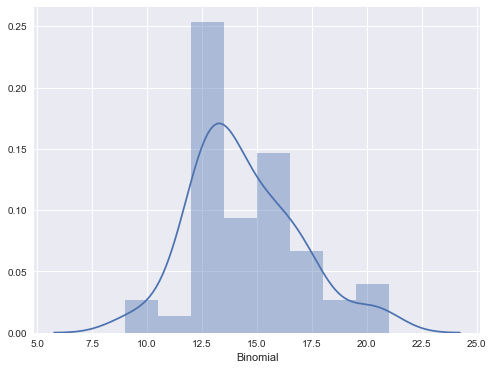

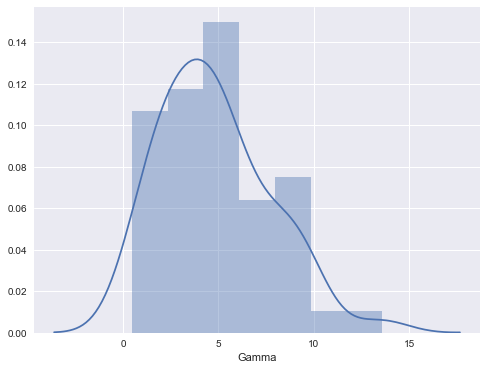

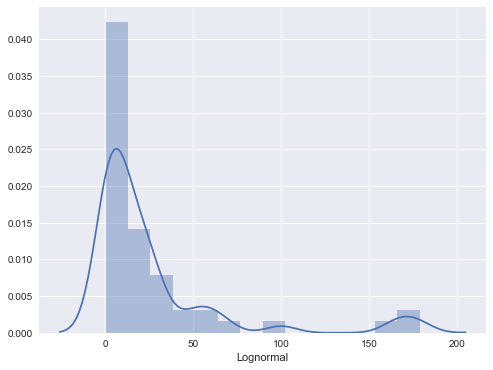

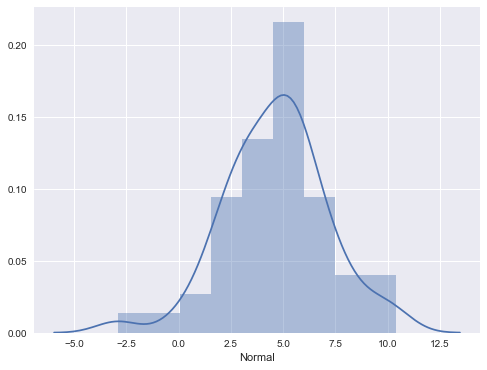

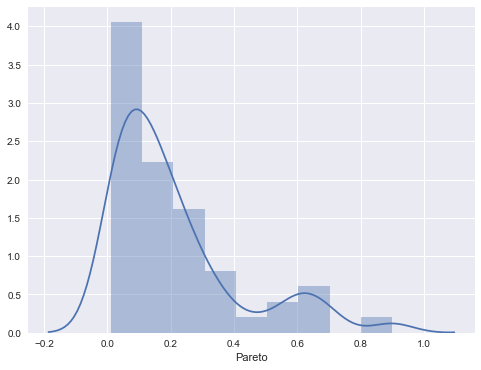

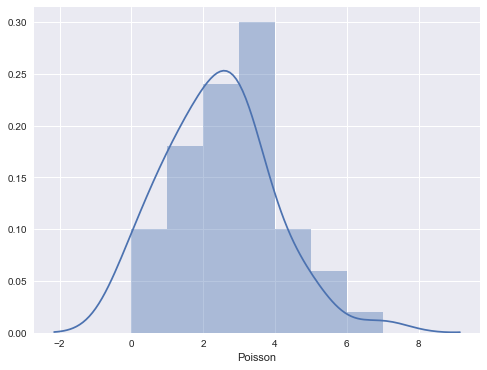

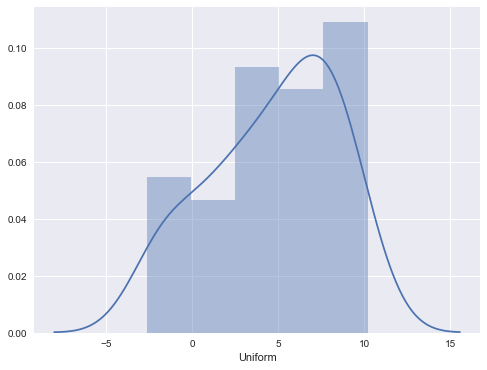

In [30]:
def show_distributions(df):
    for col in list(df.columns.values):    
      sns.distplot(df[col])
      sns.plt.show()
show_distributions(df)    
    

In [31]:
def qqplot_stats(obs, c):
    z = (obs-np.mean(obs))/np.std(obs)
    stats.probplot(z, dist="norm", plot=plt)
    plt.title("Normal Q-Q plot for " + c)
    plt.show()
        

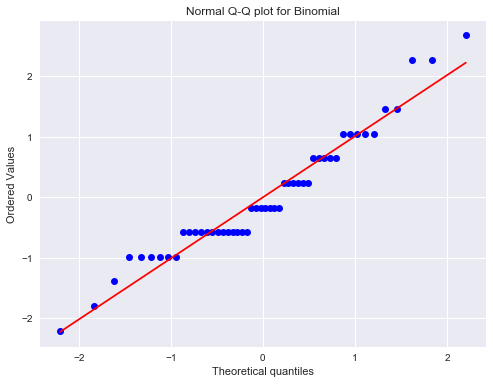

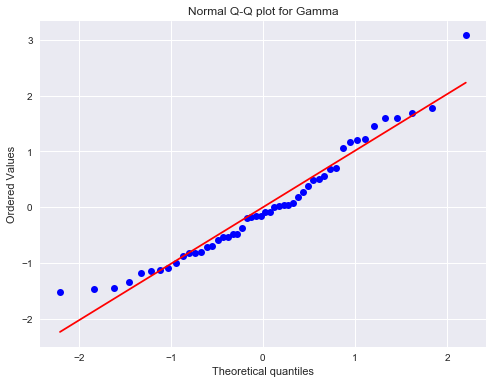

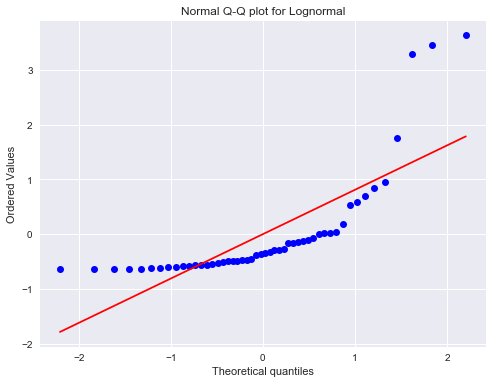

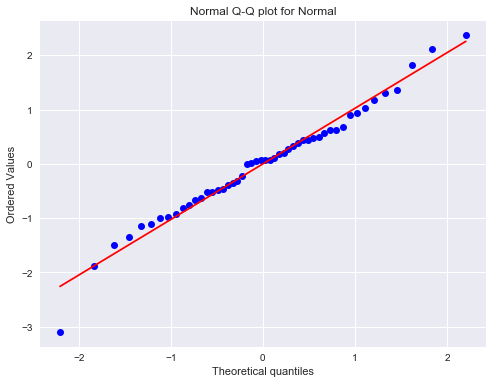

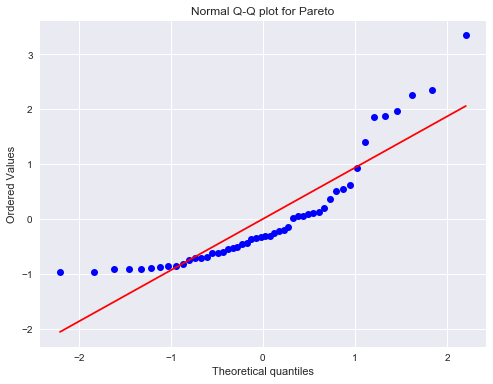

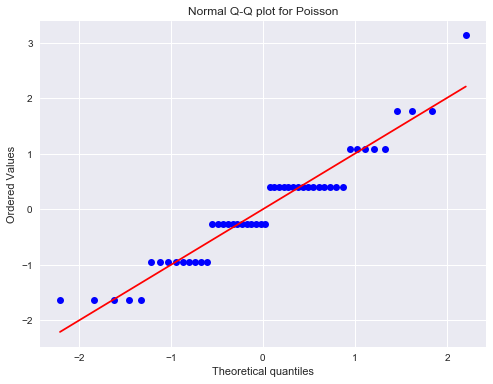

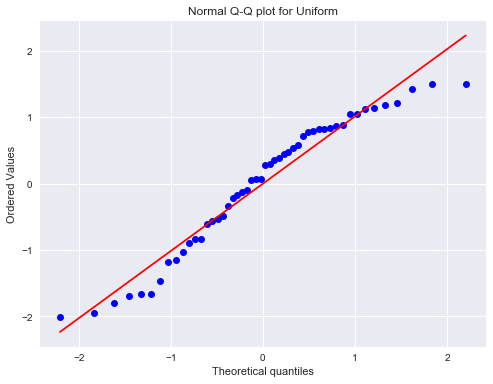

In [32]:
def qqplot_df(df):
    for col in list(df.columns.values):
      qqplot_stats(df[col], col)
qqplot_df(df) 

### Statistical tests for normality (e.g. Shapiro-Wilk test,  Anderson-Darling test, scipy.stats.normaltest, etc.)

In [33]:
def normality_stats(df):
    s={}
    for col in list(df.columns.values):
      s[col]={}
    for col in list(df.columns.values):
      s[col].update({'shapiro':stats.shapiro(df[col])})
      s[col].update({'anderson':stats.anderson(df[col], dist='norm')})
      s[col].update({'normaltest':stats.normaltest(df[col])})      
    return s


### Shapiro-Wilk test
scipy.stats.shapiro [https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.shapiro.html](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.shapiro.html)

scipy.stats.shapiro
scipy.stats.shapiro(x, a=None, reta=False)[source]
Perform the Shapiro-Wilk test for normality.

The Shapiro-Wilk test tests the null hypothesis that the data was drawn from a normal distribution.

Parameters:	
x : array_like
Array of sample data.
a : array_like, optional
Array of internal parameters used in the calculation. If these are not given, they will be computed internally. If x has length n, then a must have length n/2.
reta : bool, optional
Whether or not to return the internally computed a values. The default is False.
Returns:	
W : float
The test statistic.
p-value : float
The p-value for the hypothesis test.
a : array_like, optional
If reta is True, then these are the internally computed “a” values that may be passed into this function on future calls.

### Anderson-Darling test

scipy.stats.anderson [https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.anderson.html](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.anderson.html)

scipy.stats.anderson(x, dist='norm')
Anderson-Darling test for data coming from a particular distribution

The Anderson-Darling test is a modification of the Kolmogorov- Smirnov test kstest for the null hypothesis that a sample is drawn from a population that follows a particular distribution. For the Anderson-Darling test, the critical values depend on which distribution is being tested against. This function works for normal, exponential, logistic, or Gumbel (Extreme Value Type I) distributions.

Parameters:	
x : array_like
array of sample data
dist : {‘norm’,’expon’,’logistic’,’gumbel’,’gumbel_l’, gumbel_r’,
‘extreme1’}, optional the type of distribution to test against. The default is ‘norm’ and ‘extreme1’, ‘gumbel_l’ and ‘gumbel’ are synonyms.
Returns:	
statistic : float
The Anderson-Darling test statistic
critical_values : list
The critical values for this distribution
significance_level : list
The significance levels for the corresponding critical values in percents. The function returns critical values for a differing set of significance levels depending on the distribution that is being tested against.

### scipy.stats.normaltest

scipy.stats.normaltest [https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.stats.normaltest.html](https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.stats.normaltest.html)
scipy.stats.normaltest(a, axis=0)
Tests whether a sample differs from a normal distribution.

This function tests the null hypothesis that a sample comes from a normal distribution. It is based on D’Agostino and Pearson’s [R251], [R252] test that combines skew and kurtosis to produce an omnibus test of normality.

Parameters:	
a : array_like
The array containing the data to be tested.
axis : int or None
If None, the array is treated as a single data set, regardless of its shape. Otherwise, each 1-d array along axis axis is tested.
Returns:	
k2 : float or array
s^2 + k^2, where s is the z-score returned by skewtest and k is the z-score returned by kurtosistest.
p-value : float or array
A 2-sided chi squared probability for the hypothesis test.

In [34]:
norm_stats=normality_stats(df)
print norm_stats

{'Lognormal': {'shapiro': (0.6174455881118774, 3.567478812360747e-10), 'anderson': AndersonResult(statistic=6.6327156756596963, critical_values=array([ 0.538,  0.613,  0.736,  0.858,  1.021]), significance_level=array([ 15. ,  10. ,   5. ,   2.5,   1. ])), 'normaltest': NormaltestResult(statistic=43.890963721245626, pvalue=2.945766542513371e-10)}, 'Normal': {'shapiro': (0.9833061695098877, 0.6970633268356323), 'anderson': AndersonResult(statistic=0.25643193745190729, critical_values=array([ 0.538,  0.613,  0.736,  0.858,  1.021]), significance_level=array([ 15. ,  10. ,   5. ,   2.5,   1. ])), 'normaltest': NormaltestResult(statistic=2.8262681526520415, pvalue=0.24337931725859499)}, 'Uniform': {'shapiro': (0.9432733654975891, 0.018189335241913795), 'anderson': AndersonResult(statistic=0.83266522146109878, critical_values=array([ 0.538,  0.613,  0.736,  0.858,  1.021]), significance_level=array([ 15. ,  10. ,   5. ,   2.5,   1. ])), 'normaltest': NormaltestResult(statistic=5.65141806041

In [35]:
df=random_distributions(n=500)
df.head()

,Binomial,Gamma,Lognormal,Normal,Pareto,Poisson,Uniform
0,151,10.136279,156.969411,7.452362,1.257433,30,1.364471
1,157,0.762046,20.267140,1.770366,0.110664,29,11.944121
2,144,9.025501,1.285877,8.063565,0.006082,22,13.546600
3,141,5.927033,128.250186,2.450363,0.205417,25,3.941215
4,162,3.785662,17.986156,13.282443,2.138839,14,9.042782


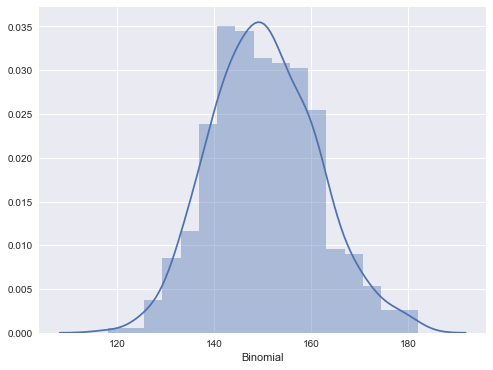

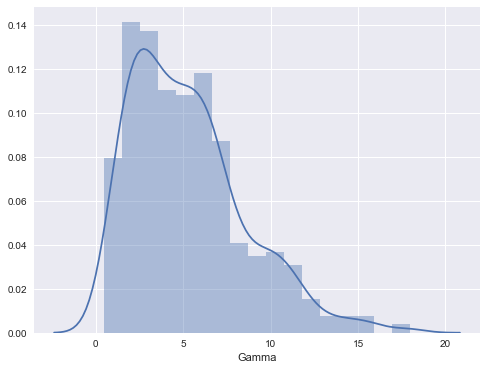

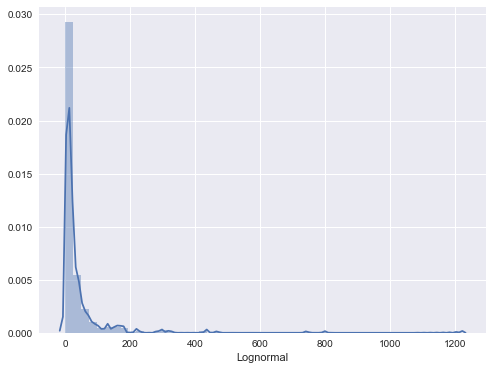

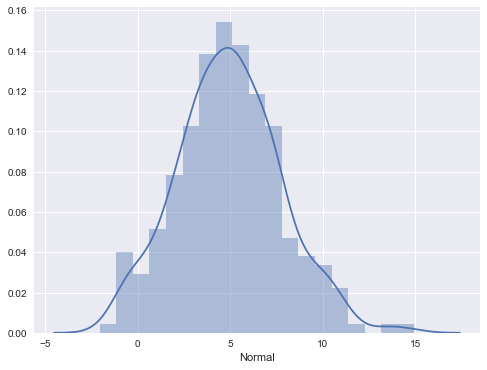

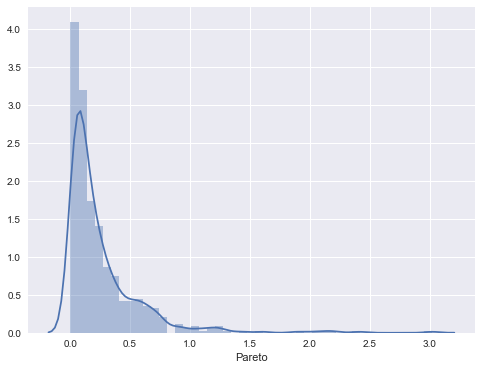

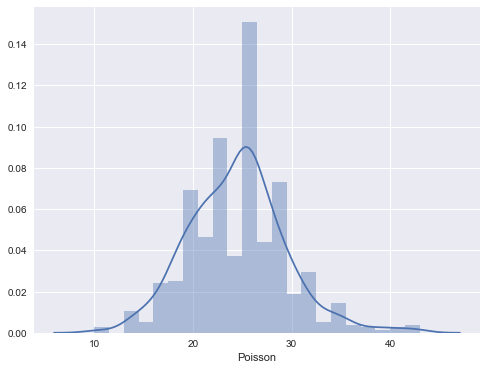

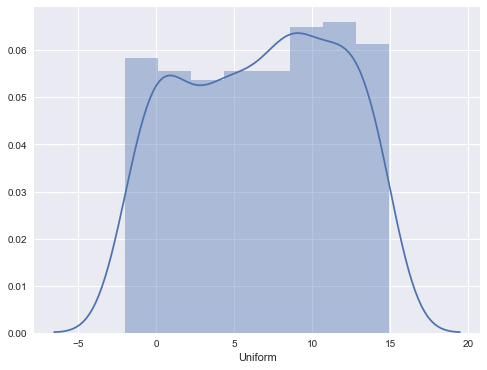

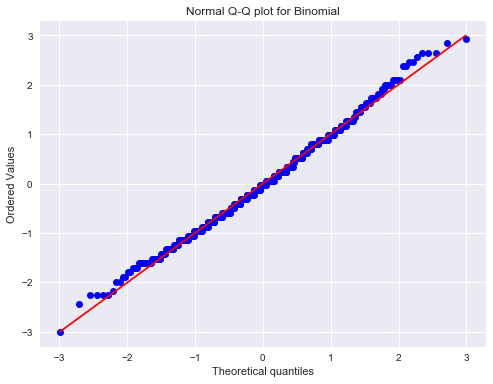

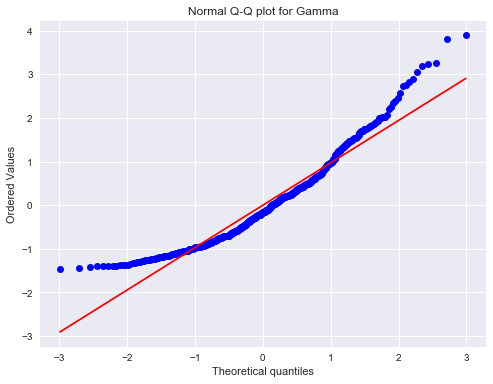

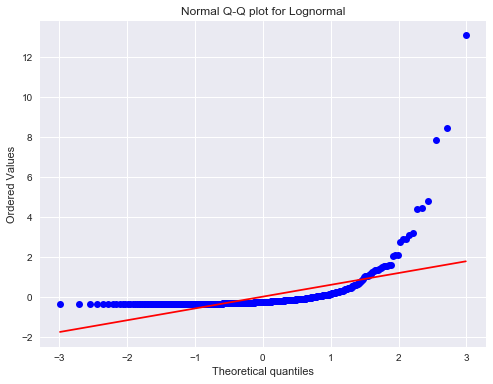

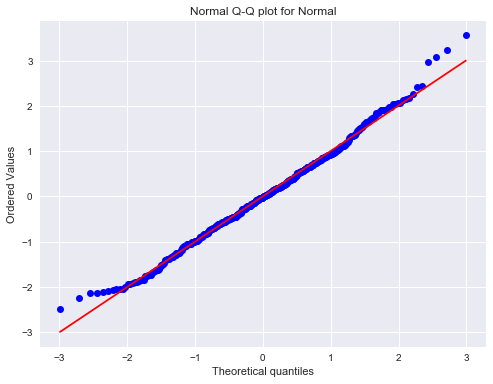

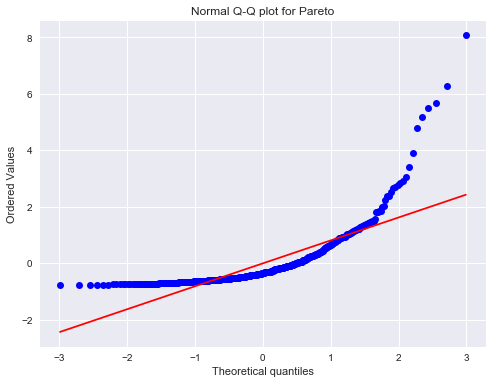

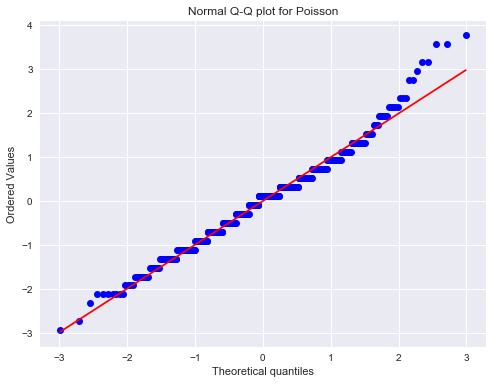

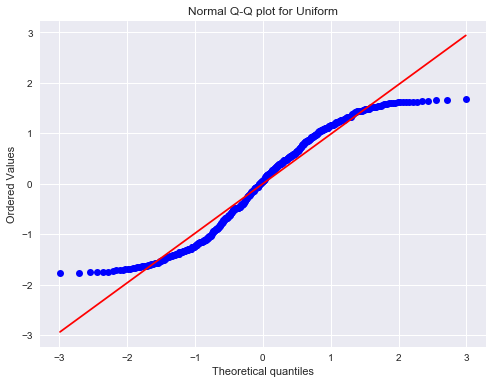

In [36]:
show_distributions(df)
qqplot_df(df)

In [37]:
norm_stats=normality_stats(df)
print norm_stats

{'Lognormal': {'shapiro': (0.3510512113571167, 1.2248256619603784e-38), 'anderson': AndersonResult(statistic=inf, critical_values=array([ 0.571,  0.651,  0.781,  0.911,  1.083]), significance_level=array([ 15. ,  10. ,   5. ,   2.5,   1. ])), 'normaltest': NormaltestResult(statistic=715.69386057574923, pvalue=3.8819756772098506e-156)}, 'Normal': {'shapiro': (0.9939094185829163, 0.04233718290925026), 'anderson': AndersonResult(statistic=0.42466783898515814, critical_values=array([ 0.571,  0.651,  0.781,  0.911,  1.083]), significance_level=array([ 15. ,  10. ,   5. ,   2.5,   1. ])), 'normaltest': NormaltestResult(statistic=5.458830907875587, pvalue=0.065257424491777558)}, 'Uniform': {'shapiro': (0.952385425567627, 1.3014731653493428e-11), 'anderson': AndersonResult(statistic=5.9837367451185628, critical_values=array([ 0.571,  0.651,  0.781,  0.911,  1.083]), significance_level=array([ 15. ,  10. ,   5. ,   2.5,   1. ])), 'normaltest': NormaltestResult(statistic=318.66939423259799, pval

/Users/bear/anaconda/envs/py27/lib/python2.7/site-packages/scipy/stats/morestats.py:1461: RuntimeWarning: divide by zero encountered in log
  A2 = -N - np.sum((2*i - 1.0) / N * (log(z) + log(1 - z[::-1])), axis=0)


In [38]:
df=random_distributions(n=5000)
df.head()

,Binomial,Gamma,Lognormal,Normal,Pareto,Poisson,Uniform
0,1464,10.039344,43.548831,6.168473,0.069523,237,-5.666741
1,1552,2.350839,2.937267,7.554780,0.352758,265,-3.666232
2,1522,5.966337,14.553654,7.859843,0.091284,246,13.414471
3,1475,7.714773,1.252262,-1.717484,0.025835,274,4.192607
4,1461,3.299739,3.717531,7.135685,0.020815,253,-4.795827


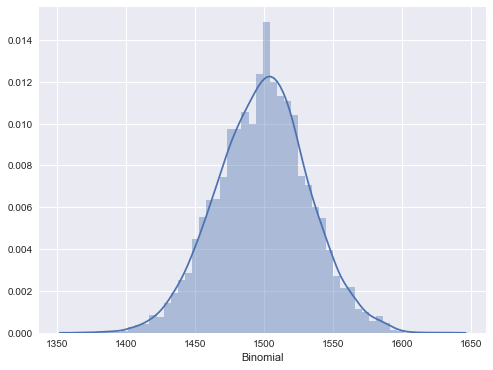

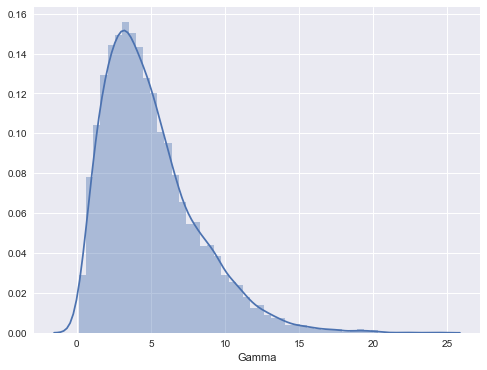

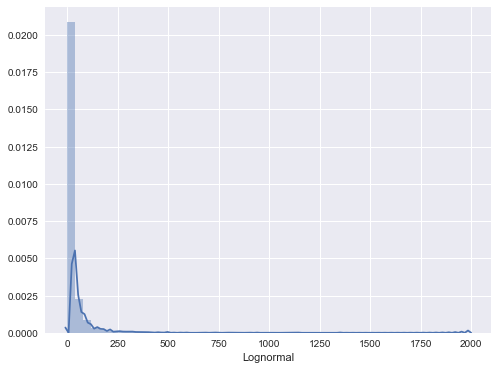

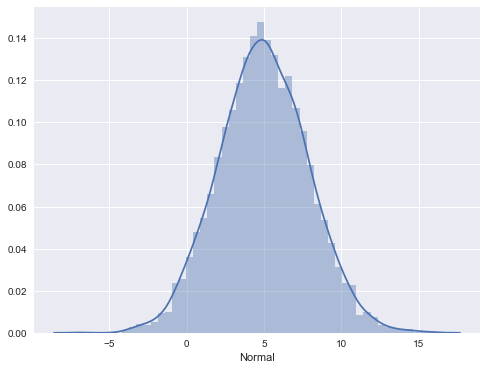

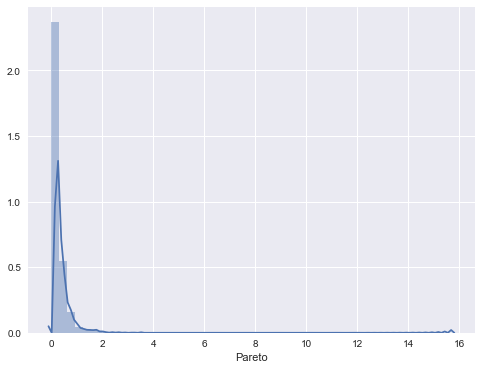

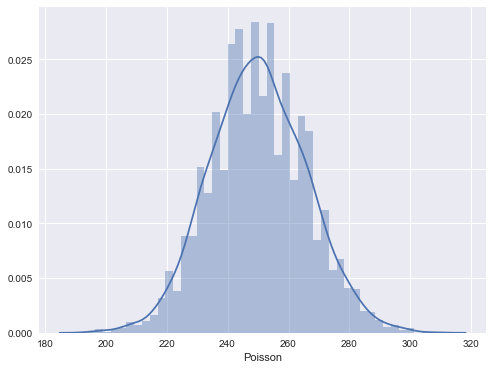

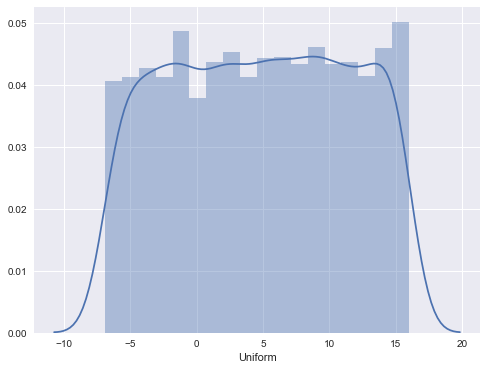

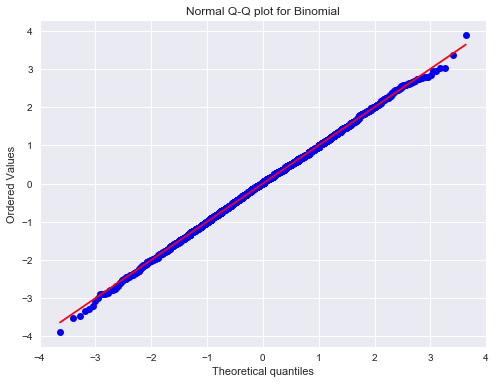

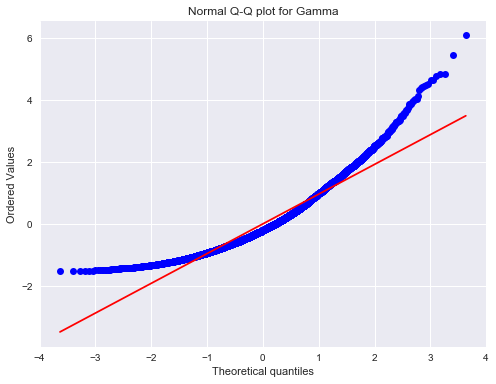

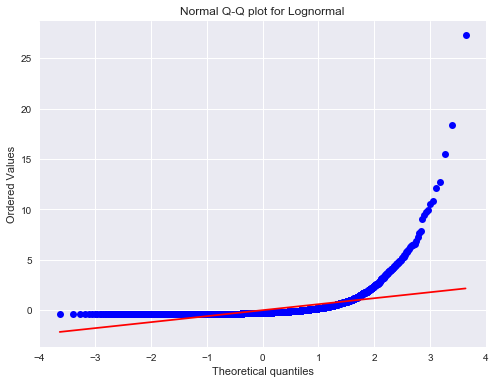

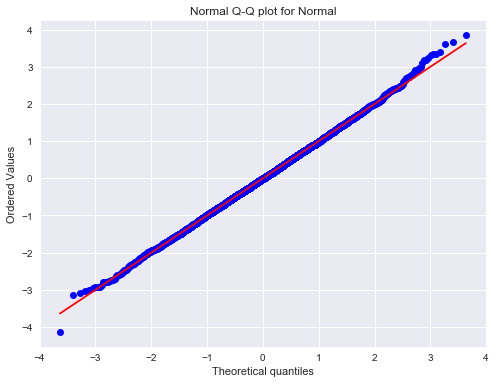

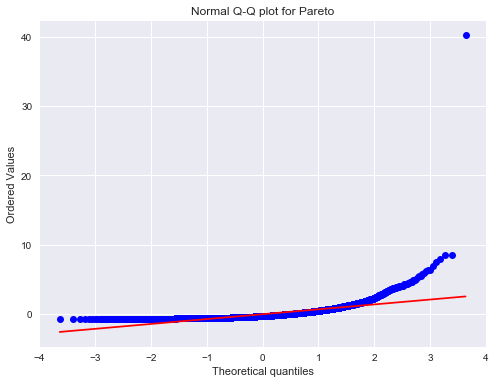

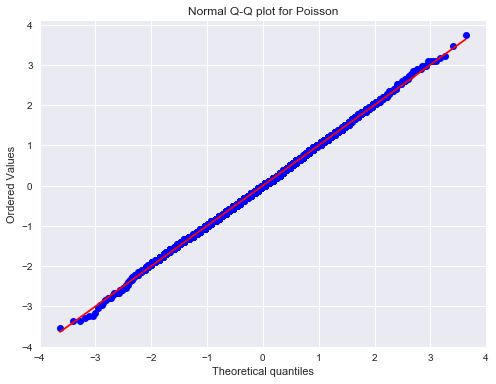

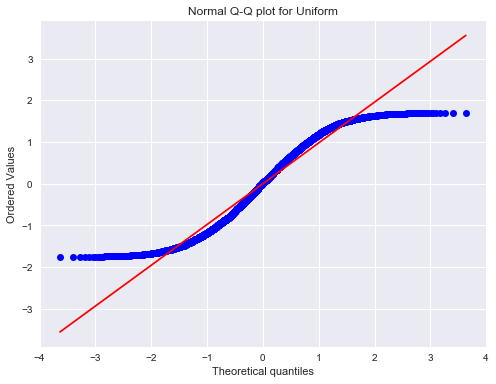

In [39]:
show_distributions(df)
qqplot_df(df)

In [40]:
norm_stats=normality_stats(df)
print norm_stats

{'Lognormal': {'shapiro': (0.353534460067749, 0.0), 'anderson': AndersonResult(statistic=inf, critical_values=array([ 0.576,  0.655,  0.786,  0.917,  1.091]), significance_level=array([ 15. ,  10. ,   5. ,   2.5,   1. ])), 'normaltest': NormaltestResult(statistic=7892.9436086805999, pvalue=0.0)}, 'Normal': {'shapiro': (0.9996205568313599, 0.47098618745803833), 'anderson': AndersonResult(statistic=0.20722501055297471, critical_values=array([ 0.576,  0.655,  0.786,  0.917,  1.091]), significance_level=array([ 15. ,  10. ,   5. ,   2.5,   1. ])), 'normaltest': NormaltestResult(statistic=3.6127763115571372, pvalue=0.1642462988057326)}, 'Uniform': {'shapiro': (0.9549009203910828, 9.377206821491268e-37), 'anderson': AndersonResult(statistic=54.886494860818857, critical_values=array([ 0.576,  0.655,  0.786,  0.917,  1.091]), significance_level=array([ 15. ,  10. ,   5. ,   2.5,   1. ])), 'normaltest': NormaltestResult(statistic=4069.401699373047, pvalue=0.0)}, 'Binomial': {'shapiro': (0.99950

In [43]:
#Read in data from source 
df = pd.read_csv("../data/admissions.csv")
df = df.dropna() 
print df.head()

   admit    gre   gpa  prestige
0      0  380.0  3.61       3.0
1      1  660.0  3.67       3.0
2      1  800.0  4.00       1.0
3      1  640.0  3.19       4.0
4      0  520.0  2.93       4.0


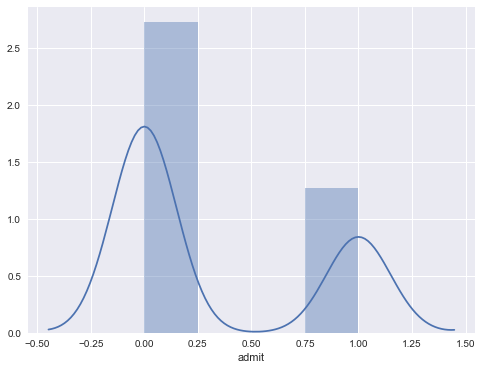

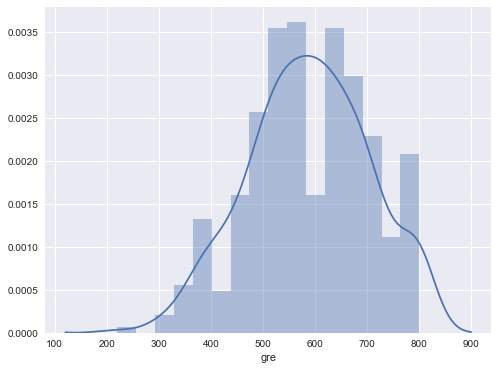

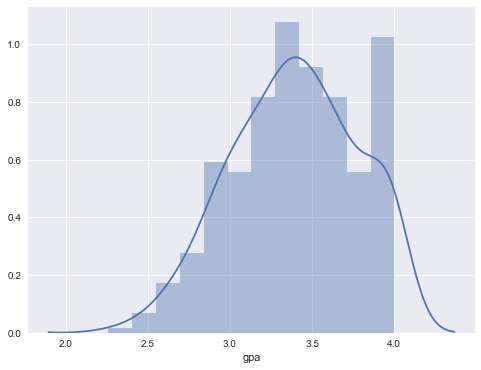

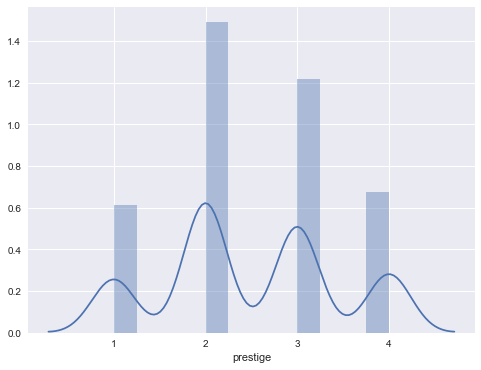

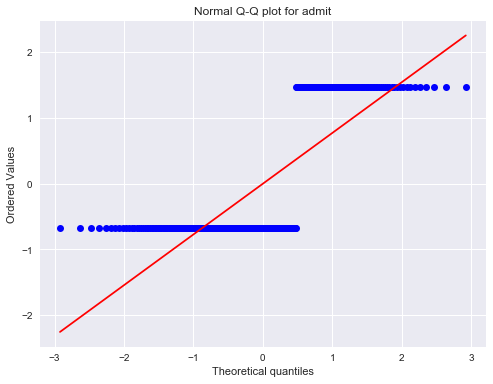

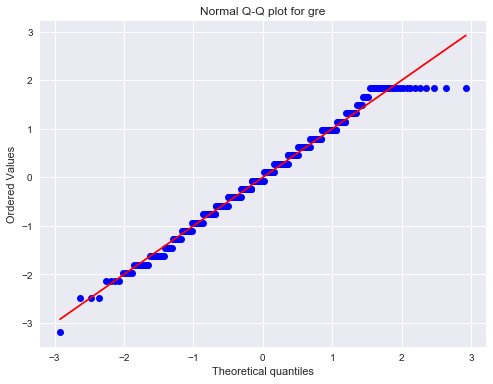

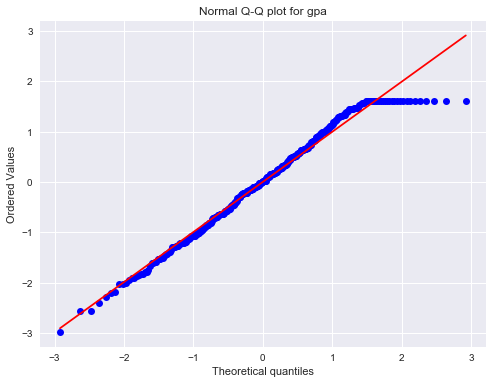

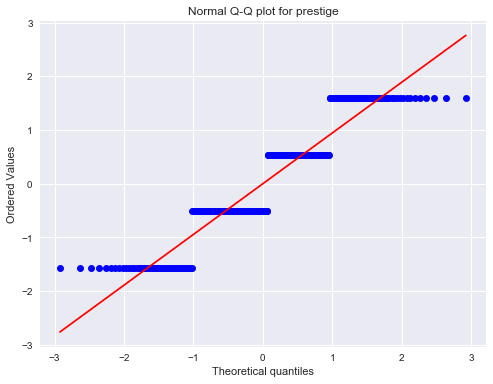

In [44]:
show_distributions(df)
qqplot_df(df)

In [45]:
norm_stats=normality_stats(df)
print norm_stats

{'admit': {'shapiro': (0.5860795974731445, 1.1764600993651039e-29), 'anderson': AndersonResult(statistic=83.932899039296672, critical_values=array([ 0.57 ,  0.65 ,  0.779,  0.909,  1.081]), significance_level=array([ 15. ,  10. ,   5. ,   2.5,   1. ])), 'normaltest': NormaltestResult(statistic=2203.8207987184628, pvalue=0.0)}, 'gre': {'shapiro': (0.9857397079467773, 0.0006041502929292619), 'anderson': AndersonResult(statistic=0.9583351930669437, critical_values=array([ 0.57 ,  0.65 ,  0.779,  0.909,  1.081]), significance_level=array([ 15. ,  10. ,   5. ,   2.5,   1. ])), 'normaltest': NormaltestResult(statistic=3.8179829306094266, pvalue=0.14822980613776662)}, 'gpa': {'shapiro': (0.9772263765335083, 6.794117325625848e-06), 'anderson': AndersonResult(statistic=1.4410937098707564, critical_values=array([ 0.57 ,  0.65 ,  0.779,  0.909,  1.081]), significance_level=array([ 15. ,  10. ,   5. ,   2.5,   1. ])), 'normaltest': NormaltestResult(statistic=13.079875560916445, pvalue=0.0014445783